![](starrynight.jpg)

# Analysis of Gender Diversity at the Museum of Modern Art
**By Nicole Kaff**

## Introduction
The Museum of Modern Art, often referred to as the MoMA, was founded in 1929 and was the first museum to be dedicated exclusively to the display of works by modern artists. Today, the MoMA is located in midtown Manhattan and remains the nation's preeminent institution for the curation of both modern and contemporary art. Modern art refers to works created between 1880 and 1960, while contemporary art refers to works made after that. The MoMA welcomes millions of visitors every year to view their collection which includes, most notably, Vincent van Gogh's _The Starry Night_,  Salvador Dalí's _The Persistence of Memory_, as well as works by Andy Warhol, Pablo Picasso, Claude Monet, Henri Matisse, and Piet Mondrian. More information on the MoMA and their collection can be found on the [MoMA's Website](https://www.moma.org/about/who-we-are/moma-history) and on [Google Arts & Culture](https://artsandculture.google.com/partner/moma-the-museum-of-modern-art). 

When people are asked to name the "greatest" artists of all time, common contenders often include Da Vinci, Michelangelo, Picasso, and Van Gogh. Rarely, if ever, are female artists brought into the mix. This is no coincidence, as the art world has been overwhelmingly dominated by male artists throughout history. In her famous 1971 essay, [_Why Have There Been No Great Women Artists?_](https://www.writing.upenn.edu/library/Nochlin-Linda_Why-Have-There-Been-No-Great-Women-Artists.pdf), Linda Nochlin addresses this phenomenon, explaining that this is not due to a lack of talent or potential in female artists but rather the institutional barriers that have historically made the professional art world inaccessible for them. Women were often denied membership to official arts institutions and did not have the opportunity to receive the same training and exhibition space as their male contemporaries. Female participation in the arts has improved significantly over the past century, with the [National Museum of Women in the Arts](https://nmwa.org/support/advocacy/get-facts/) reporting that nearly half of all working artists today are female. At the same time, a great deal of public pressure has been put on museums to diversify their collections by acquiring more works by these female artists, and in recent decades many museums have responded by claiming that they are taking their responsibility for diversity more seriously. However, another study reported by the National Museum of Women in the Arts in 2018 found that across 18 major art museums in the United States, the collections were still 87% male and 85% white. So are the museums actually living up to their commitment to diversify? Has the acquisition of works by female artists truly been increasing? Only analysis of the data can tell us that. 

In this tutorial we will examine the Museum of Modern Art in the context of these questions. The MoMA is the ideal candidate for this kind of analysis because it sources its pieces from this time frame of increasing female participation in the arts and therefore has the opportunity to acquire more works by female artists. (Whereas a museum focusing on classical art would have far less work by female artists available to them in the first place.) In the process of this analysis we will cover the fundamental components of the data science lifecycle beginning with data collection and continuing through data cleaning, exploratory data analysis, machine learning, hypothesis testing, and gathering insights. 

## Getting Started
The data set that we will be using for this tutorial comes from the Museum of Modern Art's collection respository on Github, which can be found [here](https://github.com/MuseumofModernArt/collection). The data files in this repository are updated monthly to reflect recent changes in the museum's collection. From this repository, we will be using the file **Artworks.csv**, which can be downloaded [here](https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv) by either typing **ctrl+s** OR by **right clicking and selecting "Save as"**. 

For this tutorial, we will be using the [pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide), [numpy](https://numpy.org/doc/stable/), [regex](https://docs.python.org/3/library/re.html), [seaborn](https://seaborn.pydata.org/#), [matplotlib](https://matplotlib.org/), and [statsmodels](https://www.statsmodels.org/stable/index.html) python libraries. These libraries are imported below:

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot

## Loading the Data
The first step is to load our **Artworks.csv** file into a data frame. A csv file contains lines of comma separated values.  The pandas library has a function called **read_csv** that reads in a csv file and converts it to a data frame for us. Each line in the file will become a row in the data frame and each comma separated value on that line will correspond to a value in a column. **Artworks.csv** contains 138185 rows, each representing a different work and 29 columns, each representing a particular attribute of the work.

We will also set the display options to show all 29 fields in the dataframe with the **set_option** function from the pandas library.

In [2]:
# Read in the csv and convert to a data frame
df = pd.read_csv('Artworks.csv')
# Set display to show all fields
pd.set_option("display.max_columns", 29)
# Display data frame
df

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.600000,NaN,NaN,168.900000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.640100,NaN,NaN,29.845100,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,1.1997,Architecture,Architecture & Design,1997-01-15,Y,4,http://www.moma.org/collection/works/4,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.300000,NaN,NaN,31.800000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,2.1995,Architecture,Architecture & Design,1995-01-17,Y,5,http://www.moma.org/collection/works/5,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.800000,NaN,NaN,50.800000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,2.1997,Architecture,Architecture & Design,1997-01-15,Y,6,http://www.moma.org/collection/works/6,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.400000,NaN,NaN,19.100000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138180,"Maison Modern-Style (Figueras) (plate, page 69...",Salvador Dalí,1364,"(Spanish, 1904–1989)",(Spanish),(1904),(1989),(Male),1930,Photogravure from an illustrated book with eig...,"plate: 7 3/16 × 5"" (18.3 × 12.7 cm); page (eac...",Gift of Walter Chrysler,544.1997.8,Illustrated Book,Drawings & Prints,1997-11-11,Y,417611,http://www.moma.org/collection/works/417611,NaN,NaN,NaN,NaN,18.300000,NaN,NaN,12.700000,NaN,NaN
138181,"Cullinan Wing Addition, The Museum of Fine Art...",Ludwig Mies van der Rohe,7166,"(American, born Germany. 1886–1969)",(American),(1886),(1969),(Male),1954,Ink on paper,"5 x 8"" (12.7 x 20.3 cm)","Mies van der Rohe Archive, gift of the architect",MR5405B.7,Mies van der Rohe Archive,Architecture & Design,NaN,N,417760,NaN,NaN,NaN,NaN,NaN,12.700025,NaN,NaN,20.320041,NaN,NaN
138182,"Cullinan Wing Addition, The Museum of Fine Art...",Ludwig Mies van der Rohe,7166,"(American, born Germany. 1886–1969)",(American),(1886),(1969),(Male),1954,Ink on paper,"5 x 8"" (12.7 x 20.3 cm)","Mies van der Rohe Archive, gift of the architect",MR5405B.8,Mies van der Rohe Archive,Architecture & Design,NaN,N,417761,NaN,NaN,NaN,NaN,NaN,12.700025,NaN,NaN,20.320041,NaN,NaN
138183,"Title page (folio 2) from Mörder, Hoffnung der...",Oskar Kokoschka,3197,"

## Cleaning the Data
Now that we've loaded the data into a data frame, we can easily see that each indexed row represents a different work of art in the museum's collection. Before we can explore it further, we need to tidy it up a bit. Let's start by removing the columns that we won't need for our analysis.

We can get a compact list of the fields in this data frame by accessing it's **columns** attribute.

In [3]:
df.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')

Looking at these fields, there appears to be several that won't be of use to us. In some cases this is because the data is irrelevant to our analysis. For example, we do not need the contents of the **URL** field because we don't need to access any external websites. In other cases, we may not need a column because it contains data that is repeated elsewhere. For example, the **Dimensions** field has data that is repeated in the **Height (cm)** and **Width (cm)** fields.

We will use the pandas **drop** method to remove these columns.

In [4]:
# Make a list of the columns we want to drop from the data frame
cols_to_drop = ['ConstituentID', 'ArtistBio', 'BeginDate', 'EndDate', 'Dimensions', \
                'CreditLine', 'AccessionNumber', 'Cataloged', 'ObjectID', 'URL', \
                'ThumbnailURL', 'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', \
                'Length (cm)', 'Weight (kg)', 'Seat Height (cm)', 'Duration (sec.)']
# Drop those columns
df = df.drop(columns=cols_to_drop)
# Reset the display to show the remaining 11 columns
pd.set_option("display.max_columns", 11)
# Display the first 5 rows of the data frame
df.head()

,Title,Artist,Nationality,Gender,Date,Medium,Classification,Department,DateAcquired,Height (cm),Width (cm)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,(Austrian),(Male),1896,Ink and cut-and-pasted painted pages on paper,Architecture,Architecture & Design,1996-04-09,48.6000,168.9000
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,(French),(Male),1987,Paint and colored pencil on print,Architecture,Architecture & Design,1995-01-17,40.6401,29.8451
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,(Austrian),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",Architecture,Architecture & Design,1997-01-15,34.3000,31.8000
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,(),(Male),1980,Photographic reproduction with colored synthet...,Architecture,Architecture & Design,1995-01-17,50.8000,50.8000
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,(Austrian),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",Architecture,Architecture & Design,1997-01-15,38.4000,19.1000


We will also rename the **Height (cm)** an **Width (cm)** columns so that they are cleaner and match the camel case convention used in other columns. We will do this using the pandas **rename** method, which takes as an argument a dictionary mapping the current column names to what they should be changed to. We also set **axis=1** to denote that we are changing column names (as opposed to 0 for rows) and set **inplace=True** so that the changes are made to the original data frame.

In [5]:
# Rename height and width attributes 
df.rename({'Height (cm)': 'HeightCm', 'Width (cm)': 'WidthCm'}, axis=1, inplace=True)
df.head()

,Title,Artist,Nationality,Gender,Date,Medium,Classification,Department,DateAcquired,HeightCm,WidthCm
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,(Austrian),(Male),1896,Ink and cut-and-pasted painted pages on paper,Architecture,Architecture & Design,1996-04-09,48.6000,168.9000
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,(French),(Male),1987,Paint and colored pencil on print,Architecture,Architecture & Design,1995-01-17,40.6401,29.8451
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,(Austrian),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",Architecture,Architecture & Design,1997-01-15,34.3000,31.8000
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,(),(Male),1980,Photographic reproduction with colored synthet...,Architecture,Architecture & Design,1995-01-17,50.8000,50.8000
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,(Austrian),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",Architecture,Architecture & Design,1997-01-15,38.4000,19.1000


The data is now much more concise without those extra columns. The next thing that we need to investigte is the use of parentheses in the **Nationality** and **Gender** columns. They seem unnecessary, so we should remove them. But maybe there is a reason that they are there. Let's take a look at the different values in the Gender column to see if there is anything hiding in there. We can do this with the pandas **value_counts** method.

In [6]:
# Display values in the Gender column
df['Gender'].value_counts()

(Male)                                                                                                                                                                                                                       104220
(Female)                                                                                                                                                                                                                      17699
()                                                                                                                                                                                                                             7397
(Male) (Male)                                                                                                                                                                                                                  1763
(Male) (Male) (Male)                                                                    

This is peculiar - it appears that some pieces have multiple genders in this field. Let's take a closer look at one of these unusual rows to see if we can determine why. We can do this by selecting the rows where the **Gender** column is equal to one of these values. 

In [7]:
# Examine a row with multiple gender attibutes
df[df['Gender'] == '(Male) (Male) (Female) (Male) (Male) (Male)']

,Title,Artist,Nationality,Gender,Date,Medium,Classification,Department,DateAcquired,HeightCm,WidthCm
96503,George Maciunas' In Memoriam to Adriano Olivet...,"George Maciunas, Nam June Paik, Alison Knowles...",(American) (American) (American) (American) (A...,(Male) (Male) (Female) (Male) (Male) (Male),1962,Gelatin silver print,Photograph,Drawings & Prints,NaN,20.2,25.3


It appears that this work is attributed to multiple artists and that there is a **Nationality** and **Gender** listed for each of them in separated parentheses. This won't work very well for our analysis, so we will expand any row with multiple artists into multiple rows, with one for each contributer. 

To do this, we will first use the pandas **str.split** method to split the **Nationality** and **Gender** fields with the space character as a delimiter as well as the **Artist** field with a comma as the delimiter. We set the argument **expand=True** so that each delimited string will become its own column in the row. Then we use **stack** to create rows out of these columns. The original index of our dataframe will be maintained in the resulting series, which will be useful to us later.

In [8]:
# Expand and stack works with multiple artists into series
g = df['Gender'].str.split(' ', expand=True).stack()
n = df['Nationality'].str.split(' ', expand=True).stack()
a = df['Artist'].str.split(',', expand=True).stack()

Now we will concatenate these three series into a new data frame. We will do this with the pandas **concat** function by passing in a list of these three series to join and setting **axis=1** to indicate that we want to concatenate them as columns. We will then remove the extra index with the pandas **droplevel** method.

In [9]:
# Concatenate Gender, Nationality, and Artist series
new_df = pd.concat([g,n,a], axis=1, keys=['Gender','Nationality', 'Artist'])
# Drop extra index
new_df = new_df.droplevel(1)
new_df

,Gender,Nationality,Artist
0,(Male),(Austrian),Otto Wagner
1,(Male),(French),Christian de Portzamparc
2,(Male),(Austrian),Emil Hoppe
3,(Male),(),Bernard Tschumi
4,(Male),(Austrian),Emil Hoppe
...,...,...,...
138180,(Male),(Spanish),Salvador Dalí
138181,(Male),(American),Ludwig Mies van der Rohe
138182,(Male),(American),Ludwig Mies van der Rohe
138183,(Male),(Austrian),Oskar Kokoschka


Now we can combine this new data frame with our original dataframe. First, we'll drop the **Gender**, **Nationality**, and **Artist** columns from the original data frame since we won't need them anymore. Then we will perform an inner join, using the pandas **join** function, which will combine the two data frames based on their matching indices. 

In [10]:
# Remove old nationality, gender, and artist columns
df = df.drop(['Nationality', 'Gender', 'Artist'], axis=1)
# Inner join the old and new data frames
df = df.join(new_df, how='inner')
df.head()

,Title,Date,Medium,Classification,Department,DateAcquired,HeightCm,WidthCm,Gender,Nationality,Artist
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",1896,Ink and cut-and-pasted painted pages on paper,Architecture,Architecture & Design,1996-04-09,48.6000,168.9000,(Male),(Austrian),Otto Wagner
1,"City of Music, National Superior Conservatory ...",1987,Paint and colored pencil on print,Architecture,Architecture & Design,1995-01-17,40.6401,29.8451,(Male),(French),Christian de Portzamparc
2,"Villa near Vienna Project, Outside Vienna, Aus...",1903,"Graphite, pen, color pencil, ink, and gouache ...",Architecture,Architecture & Design,1997-01-15,34.3000,31.8000,(Male),(Austrian),Emil Hoppe
3,"The Manhattan Transcripts Project, New York, N...",1980,Photographic reproduction with colored synthet...,Architecture,Architecture & Design,1995-01-17,50.8000,50.8000,(Male),(),Bernard Tschumi
4,"Villa, project, outside Vienna, Austria, Exter...",1903,"Graphite, color pencil, ink, and gouache on tr...",Architecture,Architecture & Design,1997-01-15,38.4000,19.1000,(Male),(Austrian),Emil Hoppe


Now each contributing artist (and their respective gender and nationality) will have their own row for any given work. Let's take a look at the **Gender** values again so we can see how it has changed.

In [11]:
df['Gender'].value_counts()

(Male)          119683
(Female)         21304
()               11480
(male)              30
(Non-Binary)        12
(female)             2
(Non-binary)         1
Name: Gender, dtype: int64

This is definitely much better! However, it looks like there are some inconsistencies in capitalization. We can fix those easily with the help of the pandas **str.replace** function and regular expressions.

In [12]:
# Replace (male with (Male
df['Gender'] = df['Gender'].str.replace(r'^\(male', '(Male')
# Replace female with Female
df['Gender'] = df['Gender'].str.replace('female', 'Female')
# Replace Non-binary with Non-Binary
df['Gender'] = df['Gender'].str.replace('Non-binary', 'Non-Binary')

In [13]:
df['Gender'].value_counts()

(Male)          119713
(Female)         21306
()               11480
(Non-Binary)        13
Name: Gender, dtype: int64

We will also remove the parentheses in the **Gender** and **Nationality** fields and replace any missing values with **Unspecified**. To do this, we will first need to convert both columns to string types with **astype** since the presence of **nan** in these columns makes them mixed-typed. Then we will use the **map** method to apply a lambda expression that strips off the parentheses and replaces any values of **()** or **nan** with **Unspecified**. You can learn more about lambda expressions [here](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).

In [14]:
# Convert columns to string type
df['Gender'] = df['Gender'].astype(str)
df['Nationality'] = df['Nationality'].astype(str)
# Strip parentheses and replace missing values with 'Unspecified'
df['Gender'] = df['Gender'].map(lambda x: x.lstrip('(').rstrip(')') if x != '()' and x != 'nan' else 'Unspecified')
df['Nationality'] = df['Nationality'].map(lambda x: x.lstrip('(').rstrip(')') if x != '()' and x!= 'nan' else 'Unspecified')

In [15]:
df['Gender'].value_counts()

Male           119713
Female          21306
Unspecified     14466
Non-Binary         13
Name: Gender, dtype: int64

The last thing we want to do is convert the **DateAcquired** field into just a year and not the full date, since we will be conducting our analysis with an annual level of granularity. We will do this with another lambda expression that uses a regular expression to remove the month and day from the **DateAcquired** values. Then we will replace all occurrences of the string **'nan'** with the actual float value **np.nan** and then convert the whole column to the type int. Lastly, we will rename the **DateAcquired** column to **YearAcquired** and the **Date** column to **Year** to better reflect their contents.

In [16]:
# Remove month and day values from the date acquired
df['DateAcquired'] = df['DateAcquired'].map(lambda x: re.sub(r'-\d*-\d*$', '', str(x)))
# Replace 'nan' with np.nan
df['DateAcquired'] = df['DateAcquired'].map(lambda x: int(x) if x != 'nan' else np.nan)
# Convert column to int type
df['DateAcquired'] = df['DateAcquired'].astype('Int64')
# Rename columns
df.rename({'DateAcquired': 'YearAcquired', 'Date': 'Year'}, axis=1, inplace=True)
df.head()

,Title,Year,Medium,Classification,Department,YearAcquired,HeightCm,WidthCm,Gender,Nationality,Artist
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",1896,Ink and cut-and-pasted painted pages on paper,Architecture,Architecture & Design,1996,48.6000,168.9000,Male,Austrian,Otto Wagner
1,"City of Music, National Superior Conservatory ...",1987,Paint and colored pencil on print,Architecture,Architecture & Design,1995,40.6401,29.8451,Male,French,Christian de Portzamparc
2,"Villa near Vienna Project, Outside Vienna, Aus...",1903,"Graphite, pen, color pencil, ink, and gouache ...",Architecture,Architecture & Design,1997,34.3000,31.8000,Male,Austrian,Emil Hoppe
3,"The Manhattan Transcripts Project, New York, N...",1980,Photographic reproduction with colored synthet...,Architecture,Architecture & Design,1995,50.8000,50.8000,Male,Unspecified,Bernard Tschumi
4,"Villa, project, outside Vienna, Austria, Exter...",1903,"Graphite, color pencil, ink, and gouache on tr...",Architecture,Architecture & Design,1997,38.4000,19.1000,Male,Austrian,Emil Hoppe


## Exploratory Data Analysis
Now that our data is all cleaned up we can begin to explore it with some visualizations. 

Let's start with a basic visualization of the ratio of each **Gender** value represented in the MoMA's collection. To do this, we we will use the pandas **groupby** and **size** methods to get the number of works for each **Gender**. Then we will then use matplotlib to create a pie chart. 

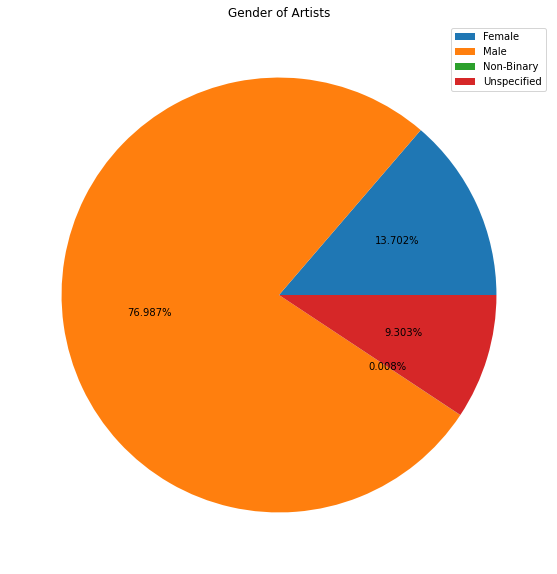

In [17]:
# Group the data by Gender and get the size of each group
data = df.groupby('Gender').size()
# Set the size of the plot 
plt.figure(figsize=(20,10))
# Make pie chart
data.plot.pie(autopct="%.3f%%",labels=None,label='',legend=True)
plt.title('Gender of Artists')
plt.show()

From this we can see that the MoMA's collection is about 77% male overall, with the remaining 23% comprised of female, non-binary, and gender-unspecified artists. This is somewhat of an improvement over the previously mentioned nationwide museum study that found 87% of artists in museums to be male. 

Let's see if this ratio changes when we examine only the 90th percentile of works in terms of size. To do this, we will first add a field to our data frame for the **Area** of a work. 

In [18]:
df['Area'] = df['HeightCm'] * df['WidthCm']

Now we will use the pandas **qcut** function to make 10 discrete quantiles out of the **Area** values. This gets added to the data frame as a new column, **AreaBin**.

In [19]:
df['AreaBin'] = pd.qcut(df['Area'], q=10, precision=0)
df.head()

,Title,Year,Medium,Classification,Department,...,Gender,Nationality,Artist,Area,AreaBin
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",1896,Ink and cut-and-pasted painted pages on paper,Architecture,Architecture & Design,...,Male,Austrian,Otto Wagner,8208.540000,"(4996.0, 10033711.0]"
1,"City of Music, National Superior Conservatory ...",1987,Paint and colored pencil on print,Architecture,Architecture & Design,...,Male,French,Christian de Portzamparc,1212.907849,"(929.0, 1420.0]"
2,"Villa near Vienna Project, Outside Vienna, Aus...",1903,"Graphite, pen, color pencil, ink, and gouache ...",Architecture,Architecture & Design,...,Male,Austrian,Emil Hoppe,1090.740000,"(929.0, 1420.0]"
3,"The Manhattan Transcripts Project, New York, N...",1980,Photographic reproduction with colored synthet...,Architecture,Architecture & Design,...,Male,Unspecified,Bernard Tschumi,2580.640000,"(2477.0, 4996.0]"
4,"Villa, project, outside Vienna, Austria, Exter...",1903,"Graphite, color pencil, ink, and gouache on tr...",Architecture,Architecture & Design,...,Male,Austrian,Emil Hoppe,733.440000,"(672.0, 929.0]"


We can view the **AreaBins** that pandas has made for us with **value_counts**. Note that each bin has approximately the same membership.

In [20]:
df['AreaBin'].value_counts()

(397.0, 516.0]          13446
(672.0, 929.0]          13311
(253.0, 397.0]          13308
(2477.0, 4996.0]        13304
(-1.0, 121.0]           13298
(1420.0, 2477.0]        13293
(121.0, 253.0]          13289
(4996.0, 10033711.0]    13283
(929.0, 1420.0]         13276
(516.0, 672.0]          13126
Name: AreaBin, dtype: int64

The bin for the largest works spans 4997-10033711 square centimeters. We will use this to retrieve the works with areas in that range, group them by gender, compute the group size, and then make a pie chart. This will show us the ratio of works in the 90th percentile of size. 

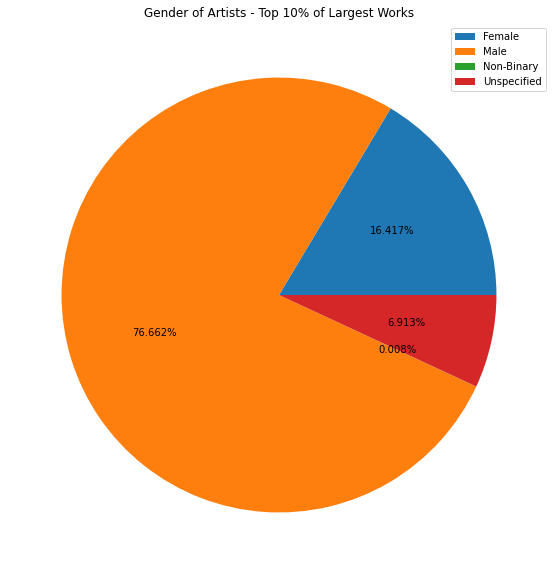

In [21]:
# Group the data in range by Gender and get the size of each group
data = df[(df['Area'] > 4996) & (df['Area'] <= 10033711)].groupby('Gender').size()
# Set the size of the plot 
plt.figure(figsize=(20,10))
# Make pie chart
data.plot.pie(autopct="%.3f%%",labels=None,label='',legend=True)
plt.title('Gender of Artists - Top 10% of Largest Works')
plt.show()

The ratio is *slightly* improved for female artists, but overall a majority of the MoMA's largest works are by by male artists. We can see below that this holds true across all of the **AreaBins**.

Below, we group the data by **AreaBin** and **Gender** and compute the **size** of each group. Then we reset the index and pivot the data frame such that our new index is the **AreaBin** and our columns are the count for each **Gender**.

In [22]:
data = df.groupby(['AreaBin', 'Gender']).size().reset_index().pivot(columns='Gender',index='AreaBin',values=0)

Now we can make a stacked bar plot from this data to visualize the ratio across all 10 **AreaBin** values.

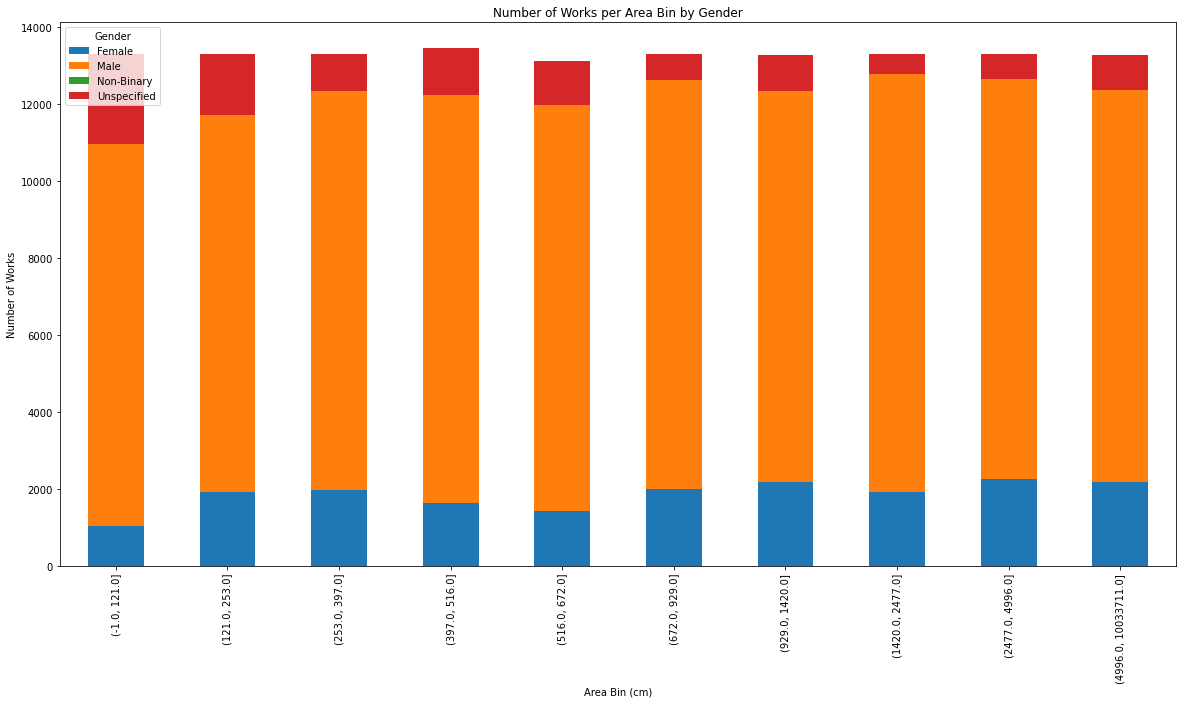

In [23]:
# Stacked bar plot of AreaBins
data.plot.bar(stacked=True, figsize=(20,10))
plt.title('Number of Works per Area Bin by Gender')
plt.xlabel('Area Bin (cm)')
plt.ylabel('Number of Works')
plt.show()


Let's also take a look at how each **Gender** breaks down by **Department**. First, let's look at the different values in the **Department** field using **value_counts**.

In [24]:
df['Department'].value_counts()

Drawings & Prints                        83713
Photography                              34078
Architecture & Design                    26358
Painting & Sculpture                      3957
Media and Performance                     3496
Film                                      1986
Fluxus Collection                         1876
Architecture & Design - Image Archive       34
Name: Department, dtype: int64

It looks like there are two different **Architecture & Design** categories. Let's merge these two into one category with **str.replace**.

In [25]:
df['Department'] = df['Department'].str.replace('Architecture & Design - Image Archive', 'Architecture & Design')

Now let's make one pie chart for each gender category to show the proportion of works belonging to each of the 7 departments. To do this, we will first make sub-frames for each gender category. Then we will again use the pandas **groupby** and **size** methods to get the number of works for each **Department**. Then we will then use matplotlib to display the data as a pie chart.

<Figure size 432x288 with 0 Axes>

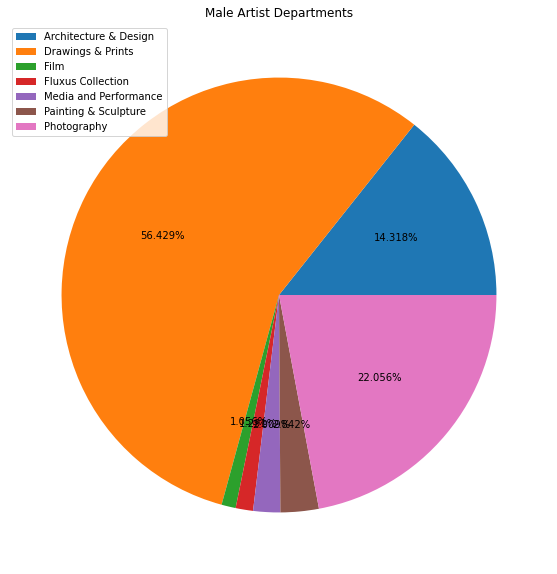

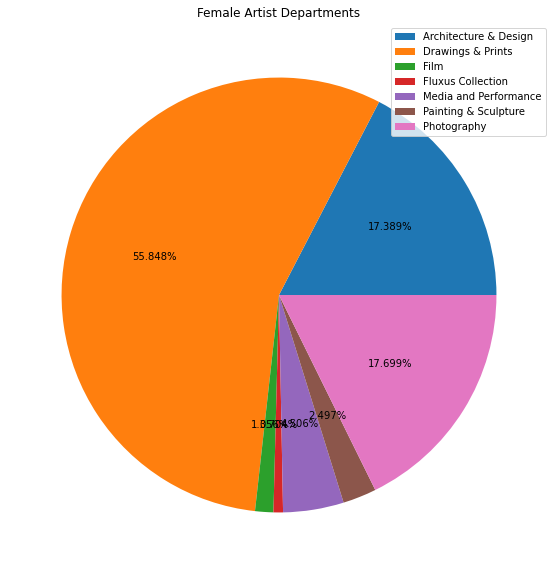

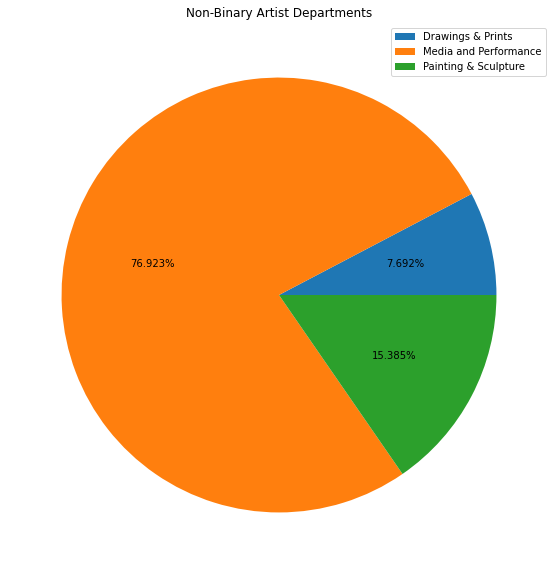

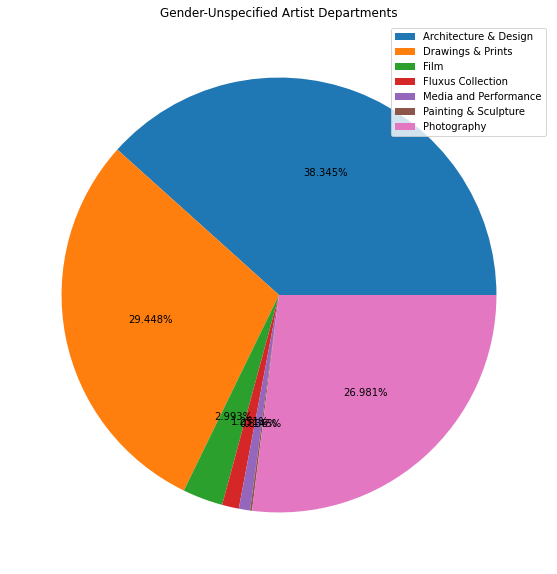

In [26]:
# Pie chart for male artists 
plt.figure(0)
# Make sub-data-frame of only works by male artists
male = df[df['Gender'] == 'Male']
# Group the data by Department and get the size of each group
data = male.groupby('Department').size()
# Make pie chart
plt.figure(figsize=(20,10))
data.plot.pie(autopct="%.3f%%",labels=None,label='',legend=True)
plt.title('Male Artist Departments')

# Pie chart for female artists
plt.figure(1)
fem = df[df['Gender'] == 'Female']
data = fem.groupby('Department').size()
plt.figure(figsize=(20,10))
data.plot.pie(autopct="%.3f%%",labels=None,label='',legend=True)
plt.title('Female Artist Departments')

# Pie chart for Non-Binary artists
plt.figure(2)
nb = df[df['Gender'] == 'Non-Binary']
data = nb.groupby('Department').size()
plt.figure(figsize=(20,10))
data.plot.pie(autopct="%.3f%%",labels=None,label='',legend=True)
plt.title('Non-Binary Artist Departments')

# Pie chart for gender-unspecified artists
plt.figure(3)
unsp = df[df['Gender'] == 'Unspecified']
data = unsp.groupby('Department').size()
plt.figure(figsize=(20,10))
data.plot.pie(autopct="%.3f%%",labels=None,label='',legend=True)
plt.title('Gender-Unspecified Artist Departments')

plt.show()

It appears that male and female artists have similar proportions of work across the 7 different departments: Just over 1/2 of male and female artworks are drawings and prints, about 1/5 are photographs, about 1/6 are architecture and design, and what remains is a mix of the other 4 departments. Although these proportions are similar, we saw in the first pie chart that there is 6x more works by male artists than female artists, so it is far from equal. 

Let's turn now to examining the number of acquisitions over time. To do this we will **groupby** the **YearAcquired** field and use the **size** method to get the number of works acquired in each year.

In [27]:
# Group the data by YearAcquired and get the size of each group
acq_per_year = df[df['YearAcquired'].notnull()].groupby('YearAcquired').size()
acq_per_year

YearAcquired
1929       9
1930       7
1931       3
1932      19
1933      93
        ... 
2016    2276
2017    1867
2018    2742
2019    1768
2020     229
Length: 92, dtype: int64

Now we will use **matplotlib** and the **seaborn scatterplot** function to create a scatter plot of year vs number of works acquired in that year.

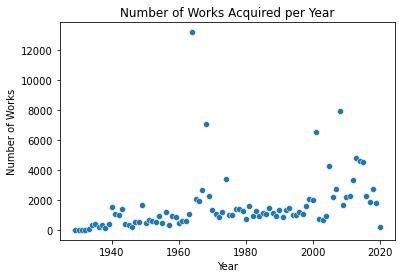

In [28]:
# Scatter plot of works acquired per year
sns.scatterplot(data=acq_per_year)
plt.title('Number of Works Acquired per Year')
plt.xlabel('Year')
plt.ylabel('Number of Works')
plt.show()

A visual inspection of this scatterplot suggests that there is a postive trend to this data. In other words as time goes on, the MoMA is acquiring more works per year. Let's break it down by gender to see if they are also aquiring more works by female artists per year. 

To do this we **groupby** both the **YearAcquired** and **Gender** fields, compute the **size** of each of these year/gender combinations, and convert to a data frame with the **to_frame** method. Then we reset the index and set the name of our new field containing the number of works acquired for that gender/year to **NumWorks**.

In [29]:
# Group the data by YearAcquired and Gender, get the size of each group, convert to data frame
acq_per_year = df[df['YearAcquired'].notnull()].groupby(['YearAcquired', 'Gender']).size().to_frame()
# Reset the data frame index
acq_per_year.reset_index()
# Rename new field
acq_per_year.rename({0: 'NumWorks'}, axis=1, inplace=True)
acq_per_year

NumWorks
YearAcquired Gender               
1929         Male                9
1930         Male                7
1931         Male                3
1932         Female              1
             Male               18
...                            ...
2019         Unspecified       330
2020         Female             56
             Male              165
             Non-Binary          1
             Unspecified         7

[273 rows x 1 columns]

Now we will use matplotlib and the seaborn scatterplot function to create a scatter plot of year vs number of works acquired in that year, this time setting **hue='Gender'** so that each gender category is colored differently. 

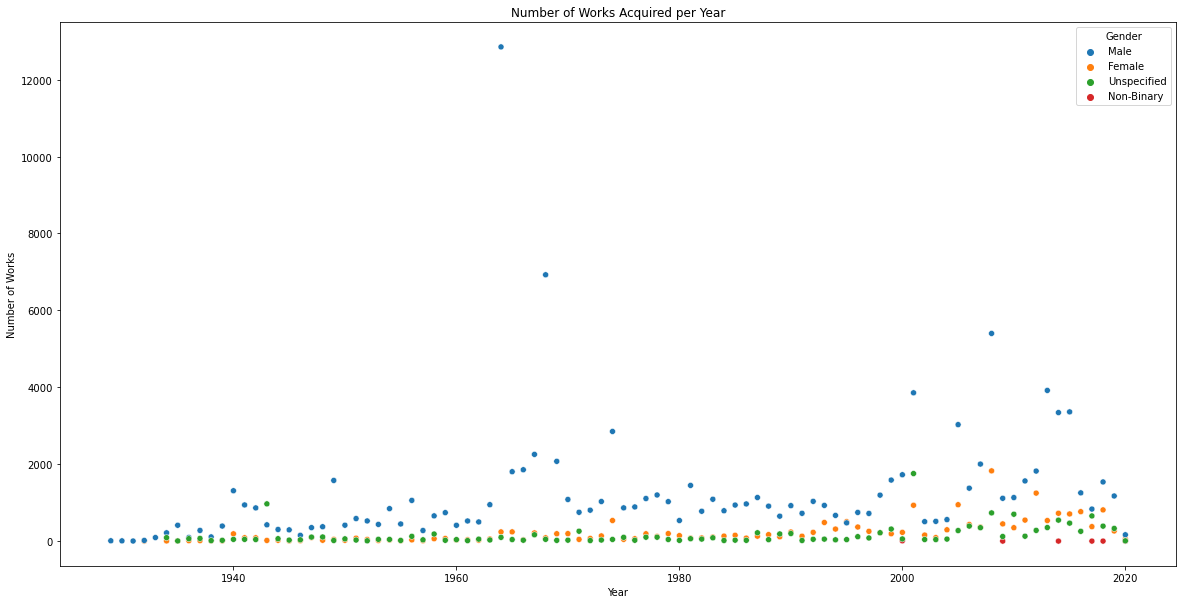

In [30]:
# Scatter plot of works acquired per year by Gender
plt.figure(figsize=(20,10))
ax = sns.scatterplot(data=acq_per_year, x='YearAcquired', y='NumWorks', hue='Gender')
plt.title('Number of Works Acquired per Year')
plt.xlabel('Year')
plt.ylabel('Number of Works')
plt.show()

Based on a visual inspection, there is a significant amount of variation over time and it's hard to define a particular trend in acquisition. Let's look at our question of acquisition from a different angle by investigating the cumulative number of works in the collection over time. Let's first look at the cumulative number of works overall before breaking it down by gender category.

To do this, we will follow steps similar to how we made the **acq_per_year** data frame. This time, however, we will only **groupby** the **YearAcquired**. We will also add an additional column called **sum** and populate it with the cumulative sum of works in the collection over time using the pandas **cumsum** method.

In [31]:
# Group the data by YearAcquired, get the size of each group, convert to data frame
cumulative = df.groupby('YearAcquired').size().to_frame()
# Reset the data frame index
cumulative.reset_index()
# Rename new field
cumulative.rename({0: 'NumWorks'}, axis=1, inplace=True)
# Add another new field for the cumulative sum
cumulative['sum'] = cumulative.NumWorks.cumsum()
cumulative

,NumWorks,sum
YearAcquired,,
1929,9,9
1930,7,16
1931,3,19
1932,19,38
1933,93,131
...,...,...
2016,2276,141131
2017,1867,142998
2018,2742,145740


Now we can use matplotlib and the seaborn scatterplot function to create a scatter plot of year vs the cumulative number of works in the MoMA's collection.

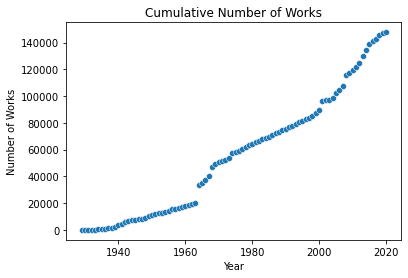

In [32]:
# Scatter plot of cumulative number of works in the collection
sns.scatterplot(data=cumulative, x='YearAcquired', y='sum')
plt.title('Cumulative Number of Works')
plt.xlabel('Year')
plt.ylabel('Number of Works')
plt.show()

Visual inspection suggests that there is a positive trend in accumulation of works that is mostly linear. In other words, the MoMA's collection has grown at a constant rate over time. Let's see if this is true for both male and female artists as well.

We will start with the male artists. For this we will use our sub data frame that we made above that contains only the works by male artists. We will follow the same steps that we did in creating the overall **cumulative** data frame.

In [33]:
# Group the male data by YearAcquired, get the size of each group, convert to data frame
cumulative_male = male[male['YearAcquired'].notnull()].groupby('YearAcquired').size().to_frame()
# Reset the data frame index
cumulative_male.reset_index()
# Rename new field
cumulative_male.rename({0: 'NumWorks'}, axis=1, inplace=True)
# Add another new field for the cumulative sum
cumulative_male['sum'] = cumulative_male.NumWorks.cumsum()
cumulative_male

,NumWorks,sum
YearAcquired,,
1929,9,9
1930,7,16
1931,3,19
1932,18,37
1933,93,130
...,...,...
2016,1255,110700
2017,834,111534
2018,1539,113073


Now let's do the same thing for female artists.

In [34]:
# Group the female data by YearAcquired, get the size of each group, convert to data frame
cumulative_fem = fem[fem['YearAcquired'].notnull()].groupby('YearAcquired').size().to_frame()
# Reset the data frame index
cumulative_fem.reset_index()
# Rename new field
cumulative_fem.rename({0: 'NumWorks'}, axis=1, inplace=True)
cumulative_fem

,NumWorks
YearAcquired,
1932,1
1934,5
1935,5
1936,12
1937,14
...,...
2016,766
2017,377
2018,812


Before we apply the **cumsum** method, we need to account for the years in which the MoMA did not acquire any works by female artists. We will do this by iterating through all the years that the MoMA has been in operation (1929-2020) and if there is not an entry present for that year, we will add one with a **NumWorks** value of 0. Then we will sort the index so that the **YearAcquired** field is in order and then we will use **cumsum** to add a field for the cumulative number of works by female artists. 

In [35]:
# Get list of indices
idx = list(cumulative_fem.index)
# Iterate through years 1929-2020
for i in range(1929,2021):
    if i not in idx:
        # If a year is missing, we add an entry with a value of 0
        cumulative_fem.loc[i] = {'NumWorks': 0}
# Sort the YearAcquired index
cumulative_fem = cumulative_fem.sort_index()
# Add a new field for the cumulative sum
cumulative_fem['sum'] = cumulative_fem.NumWorks.cumsum()
cumulative_fem

,NumWorks,sum
YearAcquired,,
1929,0,0
1930,0,0
1931,0,0
1932,1,1
1933,0,1
...,...,...
2016,766,18471
2017,377,18848
2018,812,19660


Now we can use matplotlib and the seaborn scatterplot function to create a scatter plot of year vs the cumulative number of works in the MoMA's collection for both genders.

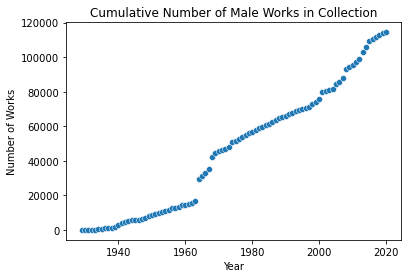

In [36]:
# Scatter plot of cumulative number of works in the collection by male artists
ax = sns.scatterplot(data=cumulative_male, x='YearAcquired', y='sum')
plt.title('Cumulative Number of Male Works in Collection')
plt.xlabel('Year')
plt.ylabel('Number of Works')
plt.show()

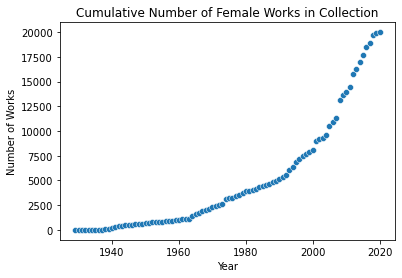

In [37]:
# Scatter plot of cumulative number of works in the collection by female artists
ax = sns.scatterplot(data=cumulative_fem, x='YearAcquired', y='sum')
plt.title('Cumulative Number of Female Works in Collection')
plt.xlabel('Year')
plt.ylabel('Number of Works')
plt.show()

The y-axis can be deceiving! The male and female works are on drastically different scales. Let's plot both data sets on the same axis. To do this, we will concatenate the cumulative male and female data frames. In doing so, a **dataset** field will be added that indicates whether the entry is part of the male or female data set.

In [38]:
# Concatenate cumulative male and female data frames
concat = pd.concat([cumulative_fem.assign(dataset='Female'), cumulative_male.assign(dataset='Male')])
concat

,NumWorks,sum,dataset
YearAcquired,,,
1929,0,0,Female
1930,0,0,Female
1931,0,0,Female
1932,1,1,Female
1933,0,1,Female
...,...,...,...
2016,1255,110700,Male
2017,834,111534,Male
2018,1539,113073,Male


Now we can use matplotlib and the seaborn scatterplot function to create a scatter plot of year vs the cumulative number of works in the MoMA's collection for both genders on the same axis. We will set **hue='dataset'** so that the male and female data points have different colors.

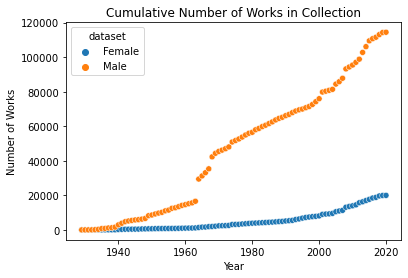

In [39]:
# Scatter plot of cumulative number of works in the collection by Gender
ax = sns.scatterplot(data=concat, x='YearAcquired', y='sum', hue='dataset')
plt.title('Cumulative Number of Works in Collection')
plt.xlabel('Year')
plt.ylabel('Number of Works')
plt.show()

## Analysis

It's now time to apply some machine learning to our data set. For this tutorial we will utilize simple linear regression, which is a supervised machine learning algorithm that finds the parameters of the linear relationship between two variables. You can learn more about linear regression [here](https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#:~:text=Linear%20Regression%20is%20a%20supervised,Simple%20regression). For this analysis, we are interested in determining the relationship between the year of acquisition and the cumulative number of works in the MoMA's collection. We will do this separately for both male and female artists and in both cases we will have the following hypotheses:

*H0 (null): There is not a linear relationship between year and total number of works by \[Male/Female\] artists.*

*H1 (alternative): There is a linear relationship between year and total number of works by \[Male/Female\] artists.*

Let's start with Male artists. We will select the rows from our cumulative **concat** data frame that represent **Male** artists and reset the index.

In [40]:
# Get cumulative male data
male_data = concat[concat['dataset'] == 'Male']
# Reset the index
male_data.reset_index(inplace=True)
male_data

,YearAcquired,NumWorks,sum,dataset
0,1929,9,9,Male
1,1930,7,16,Male
2,1931,3,19,Male
3,1932,18,37,Male
4,1933,93,130,Male
...,...,...,...,...
87,2016,1255,110700,Male
88,2017,834,111534,Male
89,2018,1539,113073,Male
90,2019,1174,114247,Male


Now we will pass this data into the statsmodels ordinary least squares function to compute the parameters for a linear model. We will also pass in the formula **sum ~ YearAcquired** to tell the function that we want to be able to predict the number of works in the collection (by male artists) based on the year. Then we call the **summary** methond on the results to view the computed parameters and other model statistics.

In [41]:
# Do linear regression
male_reg = smf.ols('sum ~ YearAcquired', data=male_data).fit()
# View the results
print(male_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3039.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           3.80e-71
Time:                        17:46:22   Log-Likelihood:                -932.86
No. Observations:                  92   AIC:                             1870.
Df Residuals:                      90   BIC:                             1875.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.601e+06    4.8e+04    -54.150   

Then we do the same thing for female artists.

In [42]:
# Get cumulative female data
fem_data = concat[concat['dataset'] == 'Female']
# Reset the index
fem_data.reset_index(inplace=True)

In [43]:
# Do linear regression 
fem_reg = smf.ols('sum ~ YearAcquired', data=fem_data).fit()
# View the results
print(fem_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     371.9
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           1.02e-33
Time:                        17:46:22   Log-Likelihood:                -850.16
No. Observations:                  92   AIC:                             1704.
Df Residuals:                      90   BIC:                             1709.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -3.72e+05   1.96e+04    -19.024   

In order for us to reject our null hypotheses, we need the p-values from our models to be less than 0.05. We can view the p-values from our models individually by calling the **pvalues** attribute on our model results.

In [53]:
print('Male Artists Results: ')
print(male_reg.pvalues, end='\n\n')
print('Female Artists Results: ')
print(fem_reg.pvalues)

Male Artists Results: 
Intercept       1.804192e-70
YearAcquired    3.795372e-71
dtype: float64

Female Artists Results: 
Intercept       2.719715e-33
YearAcquired    1.017787e-33
dtype: float64


All of the p-values are less than the 0.05 threshold value. Thus, we can reject both of our null hypotheses: <br>
*H0: There is not a linear relationship between year and total number of works by male artists.* <br>
*H0: There is not a linear relationship between year and total number of works by female artists.*

And we accept our alternative hypotheses: <br>
*H1: There is a linear relationship between year and total number of works by male artists.* <br>
*H1: There is a linear relationship between year and total number of works by female artists.*

Let's plot the regression lines overtop of the scatterplots for male and female artists. We will do this with the statsmodels **abline_plot** which plots a line given given an intercept and slope (i.e. our linear regression results). 

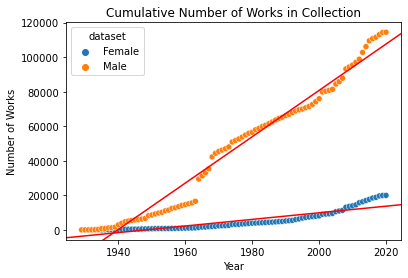

In [56]:
# Scatter plot of cumulative number of works in the collection by Gender
ax = sns.scatterplot(data=concat, x='YearAcquired', y='sum', hue='dataset')
plt.title('Cumulative Number of Works in Collection')
plt.xlabel('Year')
plt.ylabel('Number of Works')
# Add linear regression lines
abline_plot(model_results=male_reg, ax=ax, c='r')
abline_plot(model_results=fem_reg, ax=ax, c='r')
plt.show()

Let's consider a hypothetical situation. If the MoMA was to only acquire works by female artists (similar to what the [Baltimore Museum of Art did in 2020](https://www.baltimoresun.com/entertainment/arts/bs-fe-bma-female-artists-2020-20191115-33s5hjjnqfghzhmwkt7dqbargq-story.html)), how long would it take for the number of works by male and female artists to be the same? We will assume that the rate of acquisition for female artists will continue at its current rate.

In [62]:
fem_data.tail(1)

,YearAcquired,NumWorks,sum,dataset
91,2020,56,19980,Female


In [63]:
male_data.tail(1)

,YearAcquired,NumWorks,sum,dataset
91,2020,165,114412,Male


In [59]:
fem_reg.params

Intercept      -371989.448646
YearAcquired       190.952422
dtype: float64

According to the data, there 114412 works by male artists as of 2020. We can set up an equation using the values from our female artist linear regression.

114412 = -371989.448646 + 190.952422 * year

Solving this equation yields: <br>
114412 + 371989.448646 = 190.952422 * year <br>
(114412 + 371989.448646) / 190.952422 = year <br>
**2547 ≈ year**

This means that at their current rate (as per our linear model), **it would take 527 more years for female artists to have as much representation in the MoMA's collection as male artists**. And this is **assuming that acquisition of works by male artists is paused indefinitely.** 

## Conclusion
In the journey to change the narritive of there being no "great" female artists, only half the battle has been accomplished. There are more female artists than ever before but this diversity is still not reflected in the artistic institutions that shape how the general public perceives art. The presence of linear trends in acquisition suggests that there has not been a significant change in the MoMA's purchasing patterns since 1929. In other words, the rates (i.e. artworks per year) at which the MoMA has been collecting pieces by male and female artists have remained relatively constant since the museum first opened. If the museum had truly sought to diversify their collection, we would expect to see a non-linear trend in the growth of their collection of works by female artists. Since this is not the case, it is currently impossible for female artists to catch up to their male counterparts if both are to continue at their current rates. Obviously it is not feasible for the MoMA to stop collecting works by male artists for the next 527 years, but this hypothetical time frame is something of an alarming statistic. It took the MoMA only 91 years to amass a 114,412 works by male artists, so it is concerning that it would take 527 more years for the MoMA to acquire the 94,432 works by female artsits that they'd need to reach this same amount. 

The analysis conducted here certainly leaves art museums like the MoMA with plenty to think about in terms of their future acquisitions, as it is by no means a simple problem to overcome. Such concrete insights could only have been accomplished through the examination of the collection data, which highlights the importance of data science in less conventional fields such as art history. As for the followers of this tutorial, hopefully you have learned something new not just about the art world but about data science techniques as well. For those of you interested in learning more about the intersection between data science and art, check out the projects [here](https://github.com/vibertthio/awesome-machine-learning-art).